### ISM mode 


In [1]:
import numpy as np
import pandas as pd
from IPython.display import display, Markdown, Latex,HTML
from matplotlib import pyplot
import matplotlib.pylab as plt
import seaborn as sns
import os


In [2]:
print("Enter File Name")
base_path = os.getcwd()
while True:
    filename = input()
    full_path = os.path.join(base_path,filename)
    if  os.path.isfile(full_path):
        print("file found")
        break
    else:
        print("file not found. please enter proper input file name or place the file in  the same directory")

file_id = filename.split('.')[0]

Enter File Name
Alawamleh.csv
file found


## Initial Reachability Matrix


In [3]:
#/Users/saching12/Desktop/python codes/ISM/
df = pd.read_csv(full_path, delim_whitespace=True, index_col=0)
name = " <h3>Structural Self-Interaction Matrix : </h3>"
display(Markdown(name))
display(df)
IPM = np.empty(df.shape, dtype=int)

size = len(df.columns)
i = 0
# index is not being used
for index, row in df.iterrows():
    size = len(df.columns)
    while size > 0:
        if i == size - 1:
            IPM[size - 1][i] = 1
        elif pd.isnull(row[str(size)]):
            break
        else:
            if row[str(size)] == 'V':
                IPM[i][size - 1] = 1
                IPM[size - 1][i] = 0
            elif row[str(size)] == 'A':
                IPM[i][size - 1] = 0
                IPM[size - 1][i] = 1
            elif row[str(size)] == 'X':
                IPM[i][size - 1] = 1
                IPM[size - 1][i] = 1
            elif row[str(size)] == 'O':
                IPM[i][size - 1] = 0
                IPM[size - 1][i] = 0
            else:
                print("Invalid Output")
        size -= 1
    i += 1




FRM = IPM.copy()
FRM = pd.DataFrame(data=FRM,columns=df.columns[::-1],index=df.index.values)
name = " <h3>Initial Reachability Matrix : </h3>"
display(Markdown(name))
FRM


 <h3>Structural Self-Interaction Matrix : </h3>

,13,12,11,10,9,8,7,6,5,4,3,2,1
parameters,,,,,,,,,,,,,
1,A,V,O,X,X,V,A,A,A,A,A,A,NaN
2,O,V,V,V,V,V,O,V,O,A,O,NaN,NaN
3,O,V,V,V,V,V,O,V,V,O,NaN,NaN,NaN
4,O,V,V,V,V,V,O,V,O,NaN,NaN,NaN,NaN
5,O,V,V,V,V,V,O,V,NaN,NaN,NaN,NaN,NaN
6,A,V,V,V,V,V,A,NaN,NaN,NaN,NaN,NaN,NaN
7,O,V,V,V,V,V,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,A,V,V,A,O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,A,V,V,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 <h3>Initial Reachability Matrix : </h3>

,1,2,3,4,5,6,7,8,9,10,11,12,13
1,1,0,0,0,0,0,0,1,1,1,0,1,0
2,1,1,0,0,0,1,0,1,1,1,1,1,0
3,1,0,1,0,1,1,0,1,1,1,1,1,0
4,1,1,0,1,0,1,0,1,1,1,1,1,0
5,1,0,0,0,1,1,0,1,1,1,1,1,0
6,1,0,0,0,0,1,0,1,1,1,1,1,0
7,1,0,0,0,0,1,1,1,1,1,1,1,0
8,0,0,0,0,0,0,0,1,0,0,1,1,0
9,1,0,0,0,0,0,0,0,1,1,1,1,0
10,1,0,0,0,0,0,0,1,1,1,0,1,0


In [4]:
## Final Reachability Matrix
n = IPM.shape[0]   
FRM = IPM.copy()
for  k in range(n):
    for i in range(n):
        for j in range(n):
            FRM[i,j]= FRM[i][j] or (FRM[i][k]==1 and FRM[k][j])

FRM_df = pd.DataFrame(data=FRM,columns=df.columns[::-1],index=df.index.values)
FRM_df_copy = FRM_df
name = " <h3>Final Reachability Matrix : </h3>"
display(Markdown(name))
display(FRM_df)

 <h3>Final Reachability Matrix : </h3>

,1,2,3,4,5,6,7,8,9,10,11,12,13
1,1,0,0,0,0,0,0,1,1,1,1,1,0
2,1,1,0,0,0,1,0,1,1,1,1,1,0
3,1,0,1,0,1,1,0,1,1,1,1,1,0
4,1,1,0,1,0,1,0,1,1,1,1,1,0
5,1,0,0,0,1,1,0,1,1,1,1,1,0
6,1,0,0,0,0,1,0,1,1,1,1,1,0
7,1,0,0,0,0,1,1,1,1,1,1,1,0
8,0,0,0,0,0,0,0,1,0,0,1,1,0
9,1,0,0,0,0,0,0,1,1,1,1,1,0
10,1,0,0,0,0,0,0,1,1,1,1,1,0


In [5]:
## Creating barrier level
frm = pd.DataFrame(columns=['Parameter', 'Reachability_set', 'Level'], dtype=np.int8)
for i, row in enumerate(FRM):
    sub_list = []
    for index, val in enumerate(row):
        if val == 1:
            sub_list.append(index + 1)

    frm = frm.append({'Parameter': i + 1, 'Reachability_set': set(sub_list)}, ignore_index=True)

Antecedent_set = {}
Intersection_set = {}

for i, column in enumerate(FRM.T):
    sub_list = []
    for index, val in enumerate(column):
        if val == 1:
            sub_list.append(index + 1)

    Antecedent_set[i + 1] = set(sub_list)
    
for index, Antecedent in Antecedent_set.items():
    [val] = frm[frm['Parameter'] == index]['Reachability_set'].values
#print(val)
    Intersection_set[index] = Antecedent.intersection(val)
    
    
Antecedent = pd.DataFrame(list(Antecedent_set.items()), columns=['Parameter', 'Antecedent_set'])
Intersection = pd.DataFrame(list(Intersection_set.items()), columns=['Parameter', 'Intersection_set'])

Antecedent = Antecedent.merge(Intersection, on='Parameter')
BLI = frm.merge(Antecedent, on='Parameter')

BLI_copy = BLI
name = " <h3>Initial Barrier Level : </h3>"
display(Markdown(name))
display(BLI_copy)


 <h3>Initial Barrier Level : </h3>

,Parameter,Reachability_set,Level,Antecedent_set,Intersection_set
0,1.0,"{1, 8, 9, 10, 11, 12}",NaN,"{1, 2, 3, 4, 5, 6, 7, 9, 10, 13}","{1, 10, 9}"
1,2.0,"{1, 2, 6, 8, 9, 10, 11, 12}",NaN,"{2, 4}",{2}
2,3.0,"{1, 3, 5, 6, 8, 9, 10, 11, 12}",NaN,{3},{3}
3,4.0,"{1, 2, 4, 6, 8, 9, 10, 11, 12}",NaN,{4},{4}
4,5.0,"{1, 5, 6, 8, 9, 10, 11, 12}",NaN,"{3, 5}",{5}
5,6.0,"{1, 6, 8, 9, 10, 11, 12}",NaN,"{2, 3, 4, 5, 6, 7, 13}",{6}
6,7.0,"{1, 6, 7, 8, 9, 10, 11, 12}",NaN,{7},{7}
7,8.0,"{8, 11, 12}",NaN,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13}",{8}
8,9.0,"{1, 8, 9, 10, 11, 12}",NaN,"{1, 2, 3, 4, 5, 6, 7, 9, 10, 13}","{1, 10, 9}"
9,10.0,"{1, 8, 9, 10, 11, 12}",NaN,"{1, 2, 3, 4, 5, 6, 7, 9, 10, 13}","{1, 10, 9}"



# Barrier Level Iteration:



In [6]:
BLI = BLI_copy
level = 1
removed_numbers = []
BLI_final = pd.DataFrame(columns=['Parameter', 'Reachability_set','Antecedent_set','Intersection_set', 'Level'], dtype=np.int8)
while len(BLI.index) > 0:
    tem_list = BLI[BLI['Reachability_set'] == BLI['Intersection_set']]['Parameter']
    if len(tem_list.tolist()) == 0:
        break
    removed_numbers += tem_list.tolist()
    BLI.loc[BLI['Reachability_set'] == BLI['Intersection_set'], 'Level'] = level
    iteration = " <h3>Iteration Number: "+str(level)+ '</h3>'
    display(Markdown(iteration))
    display(BLI)
    for i in BLI.index:
        x = BLI.at[i,'Parameter']
        if x in removed_numbers:
            #print(BLI.loc[i]) 
            BLI_final = BLI_final.append(BLI.loc[i])
            BLI.at[i,'Intersection_set'] = None
            BLI = BLI.drop(i,axis = 0)
            
            continue
        else:
            Reachablility_temp = BLI.at[i,'Reachability_set']
            Reachablility_temp = [d for d in Reachablility_temp if float(d) not in removed_numbers]
            BLI.at[i,'Reachability_set'] =  set(Reachablility_temp)
            Antecedent_temp = BLI.at[i,'Antecedent_set']
            Antecedent_temp = [d for d in Antecedent_temp if d not in removed_numbers]
            BLI.at[i, 'Antecedent_set'] = set(Antecedent_temp)
            BLI.at[i,'Intersection_set'] = set(Antecedent_temp).intersection(set(Reachablility_temp))
    level += 1



 <h3>Iteration Number: 1</h3>

,Parameter,Reachability_set,Level,Antecedent_set,Intersection_set
0,1.0,"{1, 8, 9, 10, 11, 12}",NaN,"{1, 2, 3, 4, 5, 6, 7, 9, 10, 13}","{1, 10, 9}"
1,2.0,"{1, 2, 6, 8, 9, 10, 11, 12}",NaN,"{2, 4}",{2}
2,3.0,"{1, 3, 5, 6, 8, 9, 10, 11, 12}",NaN,{3},{3}
3,4.0,"{1, 2, 4, 6, 8, 9, 10, 11, 12}",NaN,{4},{4}
4,5.0,"{1, 5, 6, 8, 9, 10, 11, 12}",NaN,"{3, 5}",{5}
5,6.0,"{1, 6, 8, 9, 10, 11, 12}",NaN,"{2, 3, 4, 5, 6, 7, 13}",{6}
6,7.0,"{1, 6, 7, 8, 9, 10, 11, 12}",NaN,{7},{7}
7,8.0,"{8, 11, 12}",NaN,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13}",{8}
8,9.0,"{1, 8, 9, 10, 11, 12}",NaN,"{1, 2, 3, 4, 5, 6, 7, 9, 10, 13}","{1, 10, 9}"
9,10.0,"{1, 8, 9, 10, 11, 12}",NaN,"{1, 2, 3, 4, 5, 6, 7, 9, 10, 13}","{1, 10, 9}"


 <h3>Iteration Number: 2</h3>

,Parameter,Reachability_set,Level,Antecedent_set,Intersection_set
0,1.0,"{1, 8, 9, 10, 11}",NaN,"{1, 2, 3, 4, 5, 6, 7, 9, 10, 13}","{1, 10, 9}"
1,2.0,"{1, 2, 6, 8, 9, 10, 11}",NaN,"{2, 4}",{2}
2,3.0,"{1, 3, 5, 6, 8, 9, 10, 11}",NaN,{3},{3}
3,4.0,"{1, 2, 4, 6, 8, 9, 10, 11}",NaN,{4},{4}
4,5.0,"{1, 5, 6, 8, 9, 10, 11}",NaN,"{3, 5}",{5}
5,6.0,"{1, 6, 8, 9, 10, 11}",NaN,"{2, 3, 4, 5, 6, 7, 13}",{6}
6,7.0,"{1, 6, 7, 8, 9, 10, 11}",NaN,{7},{7}
7,8.0,"{8, 11}",NaN,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13}",{8}
8,9.0,"{1, 8, 9, 10, 11}",NaN,"{1, 2, 3, 4, 5, 6, 7, 9, 10, 13}","{1, 10, 9}"
9,10.0,"{1, 8, 9, 10, 11}",NaN,"{1, 2, 3, 4, 5, 6, 7, 9, 10, 13}","{1, 10, 9}"


 <h3>Iteration Number: 3</h3>

,Parameter,Reachability_set,Level,Antecedent_set,Intersection_set
0,1.0,"{8, 1, 10, 9}",NaN,"{1, 2, 3, 4, 5, 6, 7, 9, 10, 13}","{1, 10, 9}"
1,2.0,"{1, 2, 6, 8, 9, 10}",NaN,"{2, 4}",{2}
2,3.0,"{1, 3, 5, 6, 8, 9, 10}",NaN,{3},{3}
3,4.0,"{1, 2, 4, 6, 8, 9, 10}",NaN,{4},{4}
4,5.0,"{1, 5, 6, 8, 9, 10}",NaN,"{3, 5}",{5}
5,6.0,"{1, 6, 8, 9, 10}",NaN,"{2, 3, 4, 5, 6, 7, 13}",{6}
6,7.0,"{1, 6, 7, 8, 9, 10}",NaN,{7},{7}
7,8.0,{8},3.0,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13}",{8}
8,9.0,"{8, 1, 10, 9}",NaN,"{1, 2, 3, 4, 5, 6, 7, 9, 10, 13}","{1, 10, 9}"
9,10.0,"{8, 1, 10, 9}",NaN,"{1, 2, 3, 4, 5, 6, 7, 9, 10, 13}","{1, 10, 9}"


 <h3>Iteration Number: 4</h3>

,Parameter,Reachability_set,Level,Antecedent_set,Intersection_set
0,1.0,"{1, 10, 9}",4.0,"{1, 2, 3, 4, 5, 6, 7, 9, 10, 13}","{1, 10, 9}"
1,2.0,"{1, 2, 6, 9, 10}",NaN,"{2, 4}",{2}
2,3.0,"{1, 3, 5, 6, 9, 10}",NaN,{3},{3}
3,4.0,"{1, 2, 4, 6, 9, 10}",NaN,{4},{4}
4,5.0,"{1, 5, 6, 9, 10}",NaN,"{3, 5}",{5}
5,6.0,"{1, 10, 6, 9}",NaN,"{2, 3, 4, 5, 6, 7, 13}",{6}
6,7.0,"{1, 6, 7, 9, 10}",NaN,{7},{7}
8,9.0,"{1, 10, 9}",4.0,"{1, 2, 3, 4, 5, 6, 7, 9, 10, 13}","{1, 10, 9}"
9,10.0,"{1, 10, 9}",4.0,"{1, 2, 3, 4, 5, 6, 7, 9, 10, 13}","{1, 10, 9}"
12,13.0,"{1, 6, 9, 10, 13}",NaN,{13},{13}


 <h3>Iteration Number: 5</h3>

,Parameter,Reachability_set,Level,Antecedent_set,Intersection_set
1,2.0,"{2, 6}",NaN,"{2, 4}",{2}
2,3.0,"{3, 5, 6}",NaN,{3},{3}
3,4.0,"{2, 4, 6}",NaN,{4},{4}
4,5.0,"{5, 6}",NaN,"{3, 5}",{5}
5,6.0,{6},5.0,"{2, 3, 4, 5, 6, 7, 13}",{6}
6,7.0,"{6, 7}",NaN,{7},{7}
12,13.0,"{13, 6}",NaN,{13},{13}


 <h3>Iteration Number: 6</h3>

,Parameter,Reachability_set,Level,Antecedent_set,Intersection_set
1,2.0,{2},6.0,"{2, 4}",{2}
2,3.0,"{3, 5}",NaN,{3},{3}
3,4.0,"{2, 4}",NaN,{4},{4}
4,5.0,{5},6.0,"{3, 5}",{5}
6,7.0,{7},6.0,{7},{7}
12,13.0,{13},6.0,{13},{13}


 <h3>Iteration Number: 7</h3>

,Parameter,Reachability_set,Level,Antecedent_set,Intersection_set
2,3.0,{3},7.0,{3},{3}
3,4.0,{4},7.0,{4},{4}


In [7]:
display(Markdown('<h2>Final Barrier Level Iteration<h2>'))
display(BLI_final)


<h2>Final Barrier Level Iteration<h2>

,Parameter,Reachability_set,Antecedent_set,Intersection_set,Level
11,12.0,{12},"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}",{12},1.0
10,11.0,{11},"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13}",{11},2.0
7,8.0,{8},"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13}",{8},3.0
0,1.0,"{1, 10, 9}","{1, 2, 3, 4, 5, 6, 7, 9, 10, 13}","{1, 10, 9}",4.0
8,9.0,"{1, 10, 9}","{1, 2, 3, 4, 5, 6, 7, 9, 10, 13}","{1, 10, 9}",4.0
9,10.0,"{1, 10, 9}","{1, 2, 3, 4, 5, 6, 7, 9, 10, 13}","{1, 10, 9}",4.0
5,6.0,{6},"{2, 3, 4, 5, 6, 7, 13}",{6},5.0
1,2.0,{2},"{2, 4}",{2},6.0
4,5.0,{5},"{3, 5}",{5},6.0
6,7.0,{7},{7},{7},6.0


In [8]:
index = [int(d) for d in BLI_final['Parameter'].tolist()] 

FRM_df =FRM_df.reindex(index)
column = [str(d) for d in index] 
#column.append('Driving_power')
#print(column)
FRM_df = FRM_df[column]
display(Markdown('<h2>Conical Matrix:<h2>'))
display(FRM_df)



<h2>Conical Matrix:<h2>

,12,11,8,1,9,10,6,2,5,7,13,3,4
12,1,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0
8,1,1,1,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,0,0,0,0,0,0,0
9,1,1,1,1,1,1,0,0,0,0,0,0,0
10,1,1,1,1,1,1,0,0,0,0,0,0,0
6,1,1,1,1,1,1,1,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,0,0,0,0,0
5,1,1,1,1,1,1,1,0,1,0,0,0,0
7,1,1,1,1,1,1,1,0,0,1,0,0,0


## Graph plot

In [64]:
import pygraphviz as pgv
graph=pgv.AGraph(name='digraph',)
from graphviz import Digraph
#graph_file = file_id+'.gv'
graph = Digraph(file_id, filename=file_id)



for i in range(len(FRM_df.index)):
    #column = i-1
    #checked = True
    for column in range(len(FRM_df.columns)):
        '''if FRM.iloc[i][column] == 1 and FRM.iloc[column][i] == 1:
            graph.edge(str(FRM.iloc[i].name), str(FRM.iloc[:,column].name))
            graph.edge(str(FRM.iloc[:,column].name),str(FRM.iloc[i].name))'''
        if i != column and  FRM_df.iloc[i][column] == 1 :
            if i-1 >=0 and i-1 != column and FRM_df.iloc[i-1][column] == 1 :
                if FRM_df.iloc[i][column+1] == 0 and FRM_df.iloc[column+1][i] == 0:
                    graph.edge(str(FRM_df.iloc[i].name), str(FRM_df.iloc[:,column].name))
                else:
                    continue
            elif i-1 == column and i-2 >=0 and FRM_df.iloc[i-2][column]==1 and FRM_df.iloc[i][i-2]==1:
                graph.edge(str(FRM_df.iloc[i].name), str(FRM_df.iloc[i-2].name))
            else:
                graph.edge(str(FRM_df.iloc[i].name), str(FRM_df.iloc[:,column].name))
                
display(graph.view())


'failsal_thalib.pdf'

In [65]:
!rm -rf $file_id

## Dependency power and Driving power

In [9]:
dependency_power = FRM_df.sum(axis=0).rename("Dependency_power")
Driving_power = FRM_df.sum(axis=1)
#print(type(Driving_power))
#dependency_power =dependency_power.rename("Dependency_power")
FRM_df = FRM_df.append(dependency_power)
FRM_df['Driving_power'] = Driving_power
FRM_df

,12,11,8,1,9,10,6,2,5,7,13,3,4,Driving_power
12,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,2.0
8,1,1,1,0,0,0,0,0,0,0,0,0,0,3.0
1,1,1,1,1,1,1,0,0,0,0,0,0,0,6.0
9,1,1,1,1,1,1,0,0,0,0,0,0,0,6.0
10,1,1,1,1,1,1,0,0,0,0,0,0,0,6.0
6,1,1,1,1,1,1,1,0,0,0,0,0,0,7.0
2,1,1,1,1,1,1,1,1,0,0,0,0,0,8.0
5,1,1,1,1,1,1,1,0,1,0,0,0,0,8.0
7,1,1,1,1,1,1,1,0,0,1,0,0,0,8.0


## Dependency power and Driving power Diagram 

In [10]:
plot_frame = pd.DataFrame()
plot_frame['Dependency_power'] = FRM_df.loc['Dependency_power'].dropna().tolist()
plot_frame['Driving_power'] = Driving_power.tolist()
plot_frame['Parameters'] = list(map(int,BLI_final['Parameter'].tolist()))

In [14]:
from collections import Counter
combos =  list(zip(plot_frame.Dependency_power, plot_frame.Driving_power))
list_of_combos = Counter(combos)

,Dependency_power,Driving_power,Parameters
0,13.0,1,12
1,12.0,2,11
2,11.0,3,8
3,10.0,6,1
4,10.0,6,9
5,10.0,6,10
6,7.0,7,6
7,2.0,8,2
8,2.0,8,5
9,1.0,8,7


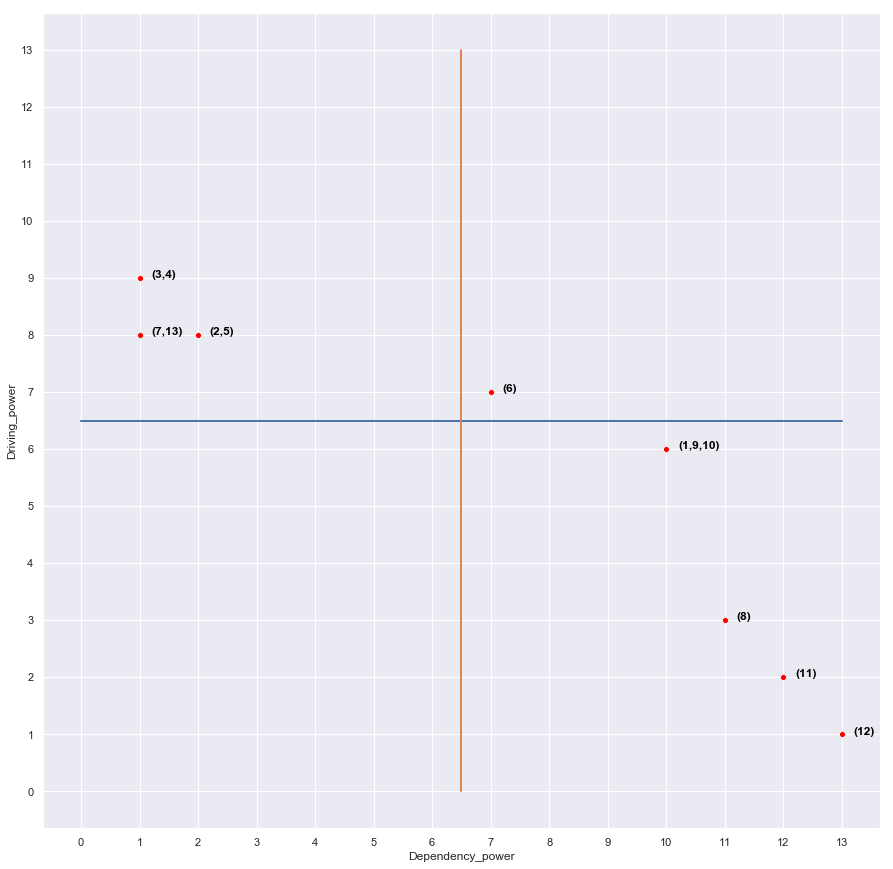

In [23]:
plt.clf()
plt.rcParams['figure.figsize'] = [15, 15]
plt.xticks(np.arange(0, max(plot_frame['Parameters'])+1, 1.0))
plt.yticks(np.arange(0, max(plot_frame['Parameters'])+1, 1.0))

sns.set(style="darkgrid")
sns_p1t=sns.scatterplot(data=plot_frame, x="Dependency_power", y="Driving_power",color='red' )
shift = 0.2

for (dependency, drive), size in list_of_combos.items():
    parameters = plot_frame[(plot_frame.Dependency_power == dependency) & (plot_frame.Driving_power == drive)].Parameters.tolist()
    text ="(" + ",".join(map(str,parameters)) + ")"
    sns_p1t.text(dependency+shift, drive, text, horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.plot([0, max(plot_frame['Parameters'])], [max(plot_frame['Parameters'])/2, max(plot_frame['Parameters'])/2], linewidth=2)
plt.plot([max(plot_frame['Parameters'])/2, max(plot_frame['Parameters'])/2], [0, max(plot_frame['Parameters'])], linewidth=2)


In [70]:
!jupyter nbconvert --to html --template html_nocode.tpl ISM\ model.ipynb --output $file_id

[NbConvertApp] Converting notebook ISM model.ipynb to html
[NbConvertApp] Writing 406722 bytes to failsal_thalib.html
